In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer


In [5]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,dmp923122274,0,0,2,0,0,3,6,0,0,...,0,0,0,4,0,0,1,0,1,0
1,dmp458034174,0,3,0,0,0,0,1,0,0,...,0,0,0,12,0,2,2,12,0,0
2,dmp364043571,0,2,0,0,0,0,0,0,2,...,0,0,0,11,0,0,0,0,0,0
3,dmp461339655,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
4,dmp549691332,0,0,0,0,0,5,7,0,0,...,0,0,1,0,0,0,1,0,0,0


In [6]:
#explore data and check for outliers
df.describe()

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.42250,0.78130,0.568100,2.823700,0.0,1.950400,2.142100,0.000200,0.393100,1.012700,...,0.41190,0.040200,0.293600,2.176900,0.459500,0.602200,0.380800,6.040600,0.206600,0.123400
std,1.01405,1.48899,1.197709,5.571438,0.0,2.937619,3.293993,0.014141,0.811319,2.266021,...,1.00436,0.196438,0.612402,3.691879,0.982169,1.194696,0.755413,7.892679,0.588856,0.328912
min,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,1.00000,0.000000,0.000000,0.0,4.000000,4.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
max,6.00000,8.00000,7.000000,28.000000,0.0,15.000000,16.000000,1.000000,4.000000,13.000000,...,7.00000,1.000000,3.000000,19.000000,5.000000,7.000000,4.000000,36.000000,4.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10000 non-null  object
 1   Addthis        10000 non-null  int64 
 2   Bebo           10000 non-null  int64 
 3   Blogcatalog    10000 non-null  int64 
 4   Blogger        10000 non-null  int64 
 5   Buddymedia     10000 non-null  int64 
 6   Cnet           10000 non-null  int64 
 7   Conduit        10000 non-null  int64 
 8   Customerlobby  10000 non-null  int64 
 9   Delicious      10000 non-null  int64 
 10  Digg           10000 non-null  int64 
 11  Diigo          10000 non-null  object
 12  Docs           10000 non-null  int64 
 13  Docstoc        10000 non-null  int64 
 14  Download       10000 non-null  int64 
 15  Dropbox        10000 non-null  int64 
 16  Drupal         10000 non-null  int64 
 17  Epinions       10000 non-null  int64 
 18  Evernote       10000 non-nu

In [8]:
#check how many columns have dtype not int64
len(df.iloc[: , 1:83].select_dtypes(exclude=["int64"]).columns)

1

In [9]:
#check out column Diigo
df["Diigo"]

0                            0
1                            0
2                            0
3       Error: value not found
4                            0
                 ...          
9995                         0
9996                         0
9997                         0
9998                         0
9999                         0
Name: Diigo, Length: 10000, dtype: object

In [10]:
df["Diigo"].value_counts()

0                         8842
Error: value not found     642
1                          332
2                          183
3                            1
Name: Diigo, dtype: int64

In [11]:
#replace Error meassage
df["Diigo"] = df["Diigo"].replace("Error: value not found", np.nan)
#check if all 642 errors were replaced
df["Diigo"].isna().sum()
df= df.dropna(axis=0)

In [12]:
df.isna().sum()

Unnamed: 0     0
Addthis        0
Bebo           0
Blogcatalog    0
Blogger        0
              ..
Yelp           0
Yfrog          0
Youtube        0
Yuku           0
Click          0
Length: 83, dtype: int64

array([[<AxesSubplot:title={'center':'Addthis'}>,
        <AxesSubplot:title={'center':'Bebo'}>,
        <AxesSubplot:title={'center':'Blogcatalog'}>,
        <AxesSubplot:title={'center':'Blogger'}>,
        <AxesSubplot:title={'center':'Buddymedia'}>,
        <AxesSubplot:title={'center':'Cnet'}>,
        <AxesSubplot:title={'center':'Conduit'}>,
        <AxesSubplot:title={'center':'Customerlobby'}>,
        <AxesSubplot:title={'center':'Delicious'}>],
       [<AxesSubplot:title={'center':'Digg'}>,
        <AxesSubplot:title={'center':'Docs'}>,
        <AxesSubplot:title={'center':'Docstoc'}>,
        <AxesSubplot:title={'center':'Download'}>,
        <AxesSubplot:title={'center':'Dropbox'}>,
        <AxesSubplot:title={'center':'Drupal'}>,
        <AxesSubplot:title={'center':'Epinions'}>,
        <AxesSubplot:title={'center':'Evernote'}>,
        <AxesSubplot:title={'center':'Facebook'}>],
       [<AxesSubplot:title={'center':'Faves'}>,
        <AxesSubplot:title={'center':'Feedbu

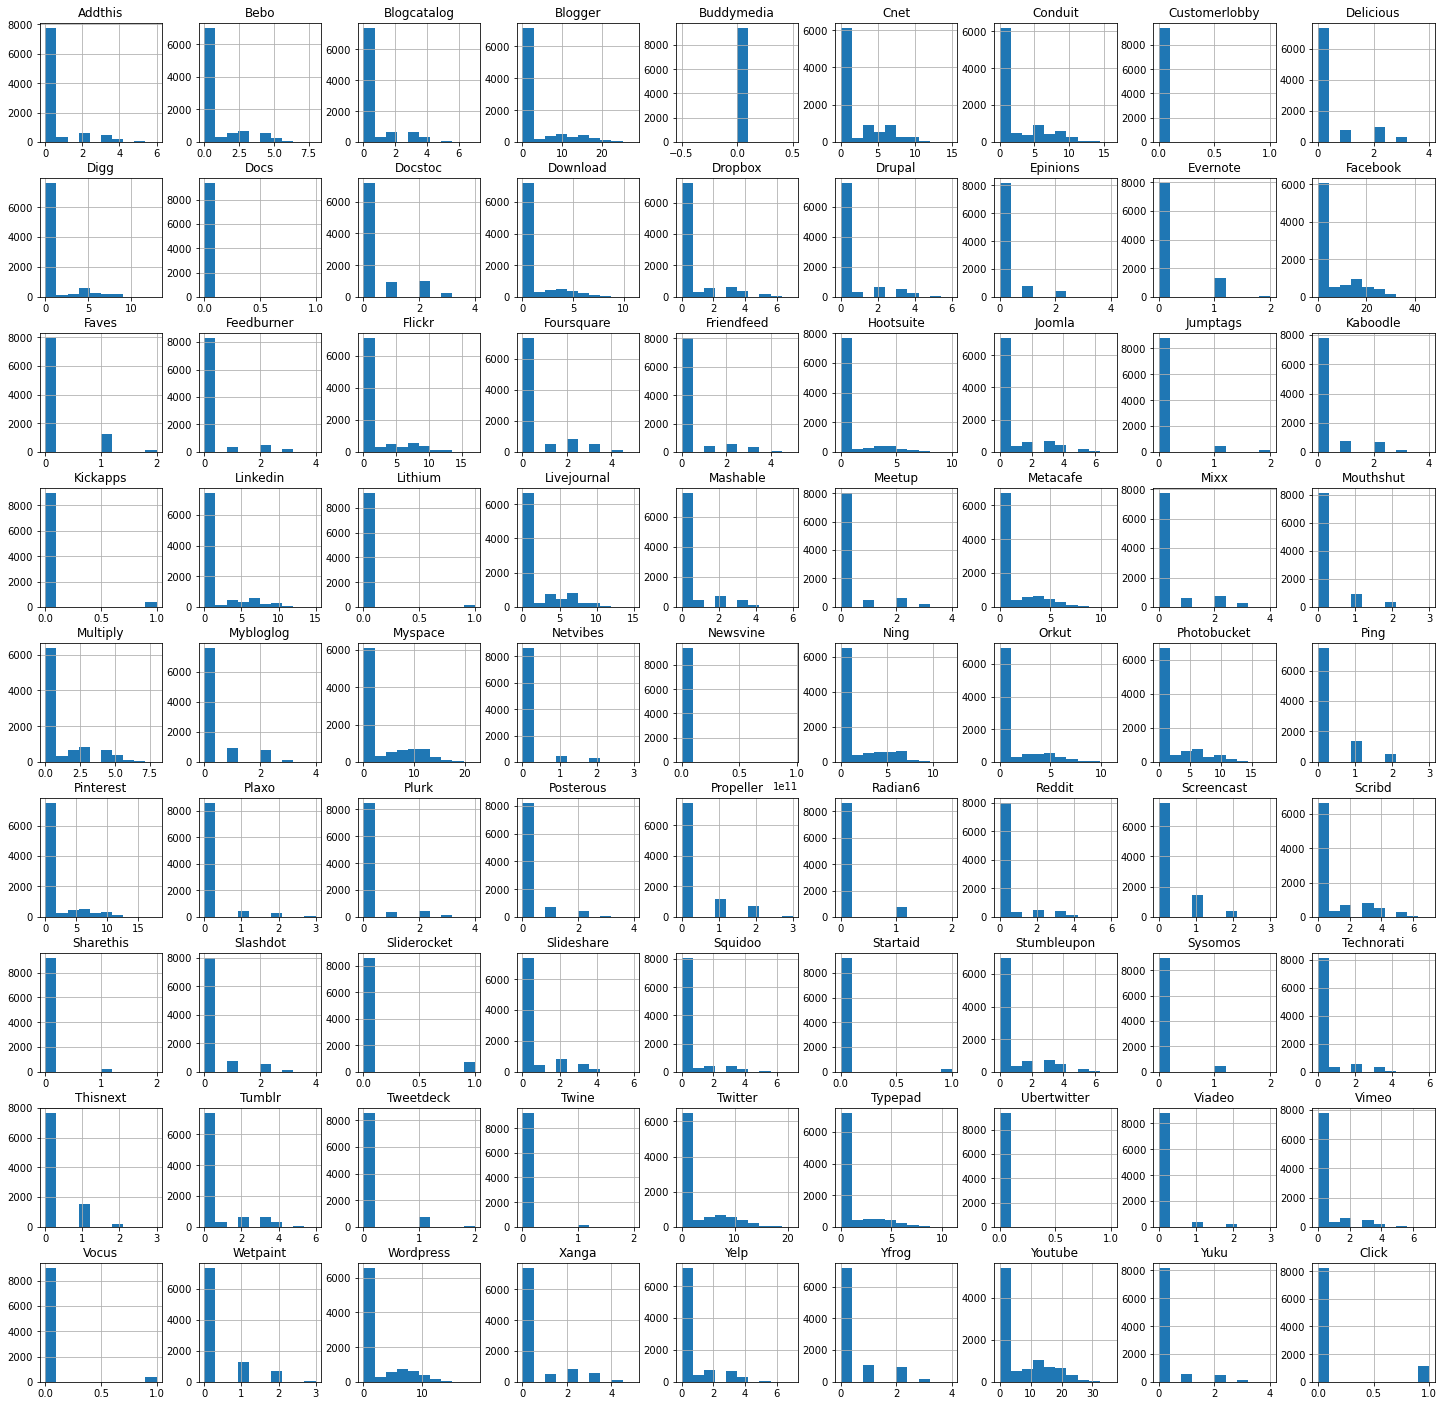

In [13]:
# Distribution with historgrams 
df.hist(bins=10, figsize=(25,25))

In [14]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,0,0,2,0,0,3,6,0,0,0,...,0,0,0,4,0,0,1,0,1,0
1,0,3,0,0,0,0,1,0,0,0,...,0,0,0,12,0,2,2,12,0,0
2,0,2,0,0,0,0,0,0,2,0,...,0,0,0,11,0,0,0,0,0,0
4,0,0,0,0,0,5,7,0,0,5,...,0,0,1,0,0,0,1,0,0,0
5,0,0,0,16,0,0,6,0,0,0,...,0,0,0,0,0,0,0,13,0,0


In [15]:
#split the data into training and testing sets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#build SVM and Random Forest classifiers and fit them to the training data.
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier()

In [17]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

In [18]:
evaluate(svm, X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1651
           1       0.88      0.87      0.87       221

    accuracy                           0.97      1872
   macro avg       0.93      0.93      0.93      1872
weighted avg       0.97      0.97      0.97      1872

[[1624   27]
 [  29  192]]


In [19]:
evaluate(rf, X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1651
           1       1.00      0.04      0.08       221

    accuracy                           0.89      1872
   macro avg       0.94      0.52      0.51      1872
weighted avg       0.90      0.89      0.84      1872

[[1651    0]
 [ 212    9]]


In [20]:
scores_svm = cross_val_score(svm, X, y, cv=5)
scores_svm

array([0.97435897, 0.97061966, 0.9732906 , 0.97808658, 0.96632817])

Task 2

In [42]:
# perform PCA with five components
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)

# get the top five most influential features
most_important_features = pd.DataFrame(pca.components_, columns=X.columns)
most_important_features = most_important_features.abs().sum(axis=0).sort_values(ascending=False)[:5]
print("Top five most influential features:")
print(most_important_features)



#Percentage of variance explained for each components
print('explained variance ratio (first five components): %s'
      % str(pca.explained_variance_ratio_))

Top five most influential features:
Youtube     1.079957
Blogger     1.057989
Myspace     1.043932
Facebook    1.040897
Newsvine    1.000000
dtype: float64
explained variance ratio (first five components): [1.00000000e+00 7.70330644e-17 6.26725564e-17 3.14491989e-17
 2.42948180e-17]


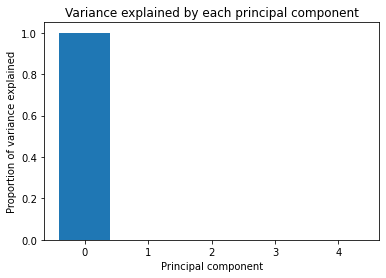

In [24]:
import matplotlib.pyplot as plt

plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Variance explained by each principal component")
plt.xlabel("Principal component")
plt.ylabel("Proportion of variance explained")
plt.show()


In [44]:
def plot_most_important_features(most_important_features):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.barh(most_important_features.index, most_important_features.values)
    ax.set_xlabel('Absolute Sum of Coefficients')
    ax.set_ylabel('Features')
    ax.invert_yaxis()
    plt.show()
#The absolute sum of coefficients represents the importance of each feature in the principal components obtained from the PCA.
#Therefore it also supports that youtube is the most important marketing channel

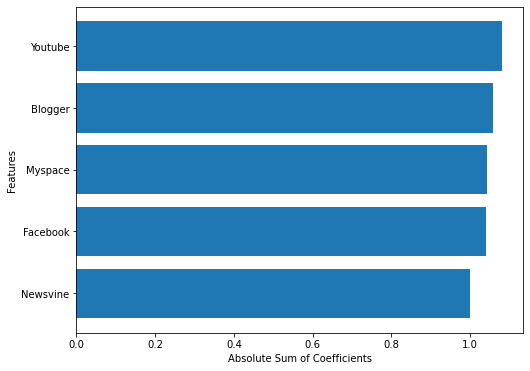

In [47]:
plot_most_important_features(most_important_features)

Task 3

Youtube is the most imporant marketing channel as it explains almost all variance in the dataset and also has the highest absolute sum of coefficient. Following this logic, Blogger is the second most important marketing channel